In [1]:
# This lets us refresh changes from other .py files without having to restart the notebook
%load_ext autoreload 
%autoreload 2

In [2]:
import torch
from torch import nn
import torchvision as tv
import torchvision.transforms.v2 as v2
import torchinfo
from blocks import *
from models import *
from utils import validateModelIO, getNormalizedTransform, showDatasetSamples, profileModel

from trainableModel import TrainingParameters, TrainableModel

from dataLoading import CIFAR10Dataset
from transforms import *


import os

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


Using device: cuda
Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([128, 16, 32, 32])
BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([128, 16, 32, 32])
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
torch.Size([128, 16, 16, 16])
ReLU()
torch.Size([128, 16, 16, 16])
Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([128, 32, 16, 16])
BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([128, 32, 16, 16])
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
torch.Size([128, 32, 8, 8])
ReLU()
torch.Size([128, 32, 8, 8])
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([128, 64, 8, 8])
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
torch.Size([128, 64, 8, 8])
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
torch.Size([1

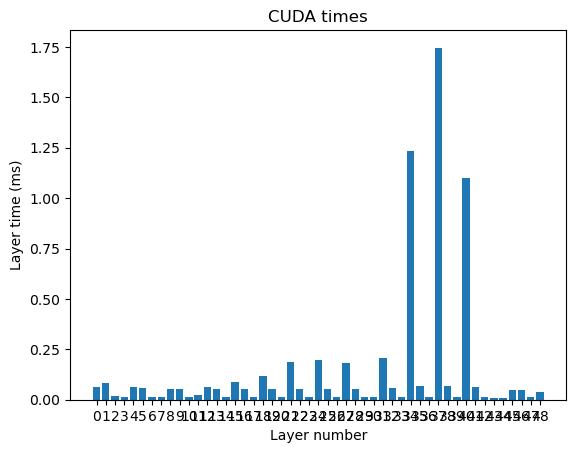

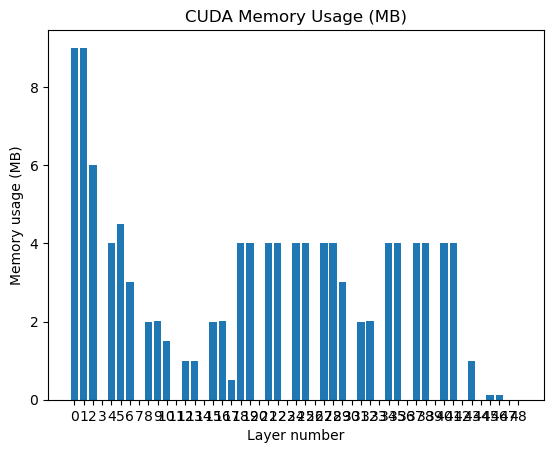

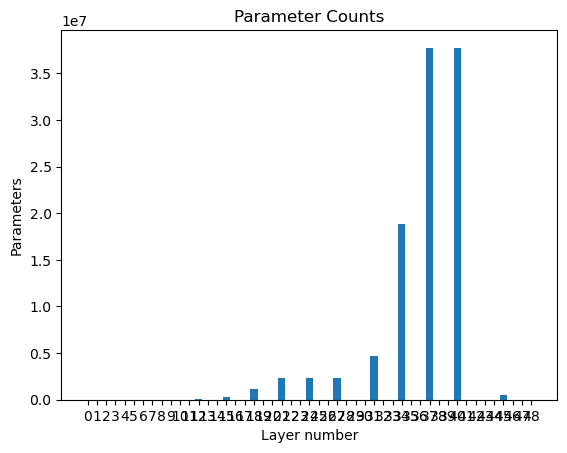

In [18]:
model = baseline108MN = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=16),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=32),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.ReLU(),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=64),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=128),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=256),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=512),
    nn.ReLU(),

    nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=512),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=512),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=512),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=1024),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=1024, out_channels=2048, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=2048),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=2048, out_channels=2048, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=2048),
    nn.ReLU(),
    
    nn.Conv2d(in_channels=2048, out_channels=2048, kernel_size=3, stride=1, padding=1),
    nn.BatchNorm2d(num_features=2048),
    nn.ReLU(),
    
    nn.AvgPool2d(kernel_size=2),
    
    nn.Flatten(),
    
    nn.Linear(in_features=2048, out_features=256),
    nn.LayerNorm(normalized_shape=256),
    nn.ReLU(),
    
    nn.Linear(in_features=256, out_features=10)
)

batchSize = 128
input_size = (batchSize, 3, 32, 32)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
model = model.to(device)

dummy_input = torch.randn(input_size, device=device, dtype=torch.float)

output = dummy_input
for layer in model.children():
    print(layer)
    output = layer(output)
    print(output.size())

# output = model(dummy_input)
assert output.size() == (batchSize, 10), f"Expected output size ({batchSize}, 10), got {output.size()}!"

summaryObject = torchinfo.summary(model=model, input_size=input_size, device=device, mode='train', depth=20, verbose=0)
print(summaryObject)

profileModel(model=model, input_size=input_size)

tensor([0.4264, 0.4189, 0.3906])
tensor([0.2261, 0.2228, 0.2170])
MAX VALUE: 1.0
MIN VALUE: 0.0


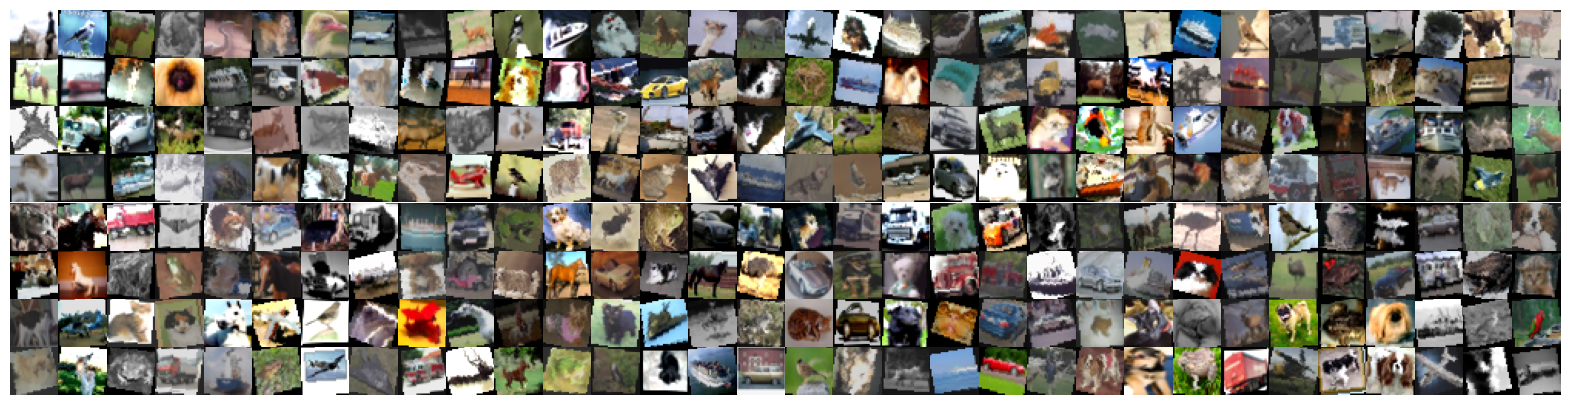

ic| features.size(): torch.Size([256, 3, 32, 32])
ic| labels.size(): torch.Size([256])


horse	bird	horse	frog	bird	dog	bird	airplane	cat	deer	bird	ship	dog	horse	bird	horse	airplane	dog	ship	automobile	automobile	ship	cat	deer	ship	bird	automobile	truck	ship	bird	dog	deer	
7	2	7	6	2	5	2	0	3	4	2	8	5	7	2	7	0	5	8	1	1	8	3	4	8	2	1	9	8	2	5	4	

In [6]:


fullDataset = CIFAR10Dataset(rootDirectory='cifar-10', csvFilename='trainLabels.csv', dataFolder='train', transform=None)

finalTransform = getNormalizedTransform(fullDataset=fullDataset, customTransforms=easyaugmentation, showSamples=True)

showDatasetSamples()

In [10]:

fullDataset = CIFAR10Dataset(rootDirectory='cifar-10', csvFilename='trainLabels.csv', dataFolder='train', transform=None)

modelParameters = TrainingParameters(fullDataset=fullDataset, trainTransform=finalTransform, valTestTransform=None, 
                                  trainValTestSplit=[0.8, 0.1, 0.1], epochs=10, warmupEpochs=5, batch_size=2048,
                                  lr=1e-2, momentum=0.8)

# PATH = os.path.normpath(r"C:\Users\Nicholas\Documents\GRADUATE OFFLINE\CS 444\CS-444-Final-Project\models\HighwayNetv3-0_Epoch100_Batch2048_LR0.1_Momentum0.8")
# loadedModel = torch.load(PATH)

# model = highwaynetv3
# model.load_state_dict(loadedModel)

trainableModel = TrainableModel('ZTestnet', model, modelParameters)
trainableModel.train()

  0%|          | 0/10 [00:00<?, ?it/s]

 lr: 0.000000, trainLoss: 2.3026, trainAccuracy: 0.1051, validationLoss: 2.3026, validationAccuracy: 0.1129:   0%|          | 0/10 [00:34<?, ?it/s]


lr: 0.000000, trainLoss: 2.3026, trainAccuracy: 0.1051, validationLoss: 2.3026, validationAccuracy: 0.1129:  10%|█         | 1/10 [00:53<08:00, 53.39s/it]


KeyboardInterrupt: 